In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

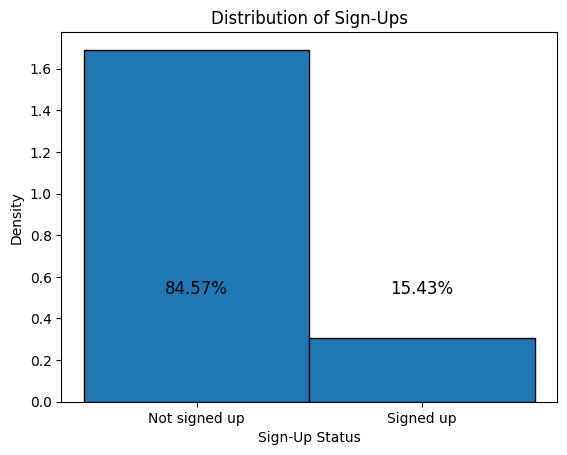

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load preprocessed data
df = pd.read_csv("../data/preprocessed/preprocessed_signups.csv")
df = df.dropna()  # Drop rows with missing values

# Plot the distribution of the target variable
plt.hist(df["signed_up"], bins=2, edgecolor="black", density=True)
# Label the columns as signed up or not signed up
plt.xticks([0.25, 0.75], ["Not signed up", "Signed up"])

# Calculate the percentages
not_signed_up_percentage = (df["signed_up"].value_counts(normalize=True)[0] * 100).round(2)
signed_up_percentage = (df["signed_up"].value_counts(normalize=True)[1] * 100).round(2)

# Add text with the percentages
plt.text(0.25, 0.5, f'{not_signed_up_percentage}%', ha='center', va='bottom', fontsize=12, color='black')
plt.text(0.75, 0.5, f'{signed_up_percentage}%', ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Sign-Up Status')
plt.ylabel('Density')
plt.title('Distribution of Sign-Ups')

plt.show()

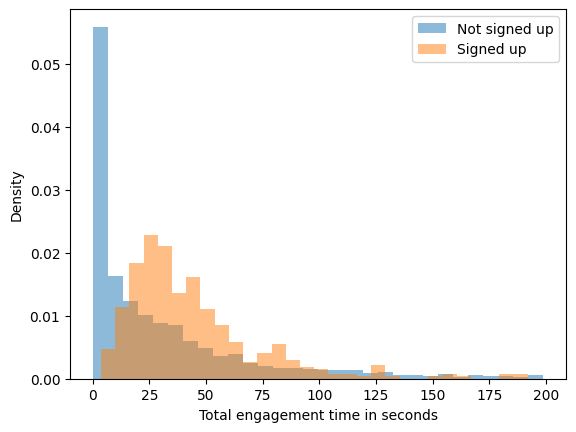

In [15]:
# Load preprocessed data
df = pd.read_csv("../data/raw/raw_signups.csv")
df = df.dropna()  # Drop rows with missing values
# Remove outliers
df = df[df["total_engagement_sec"] < 200]

# Plot the distribution of total_engagement_sec for signed up and not signed up
plt.figure()
plt.hist(df[df["signed_up"] == 0]["total_engagement_sec"], bins=30, alpha=0.5, label="Not signed up", density=True)
plt.hist(df[df["signed_up"] == 1]["total_engagement_sec"], bins=30, alpha=0.5, label="Signed up", density=True)
plt.legend()
plt.xlabel("Total engagement time in seconds")
plt.ylabel("Density")
plt.show()


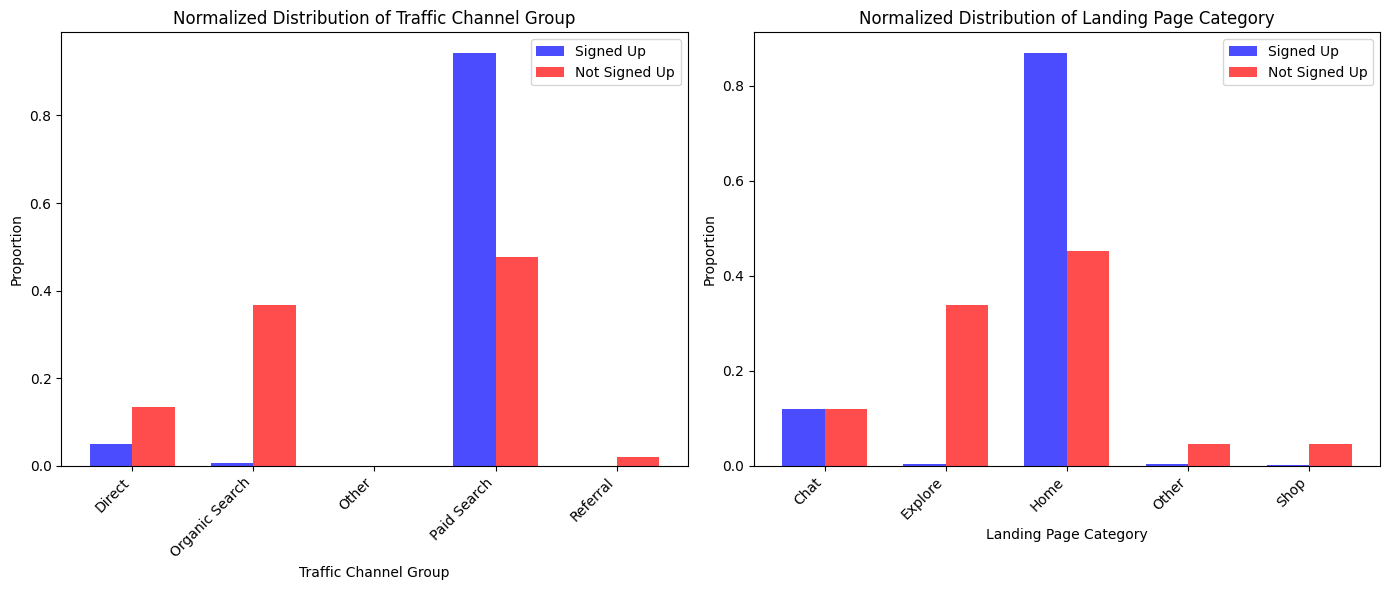

In [25]:
# Load preprocessed data
df = pd.read_csv("../data/raw/raw_signups.csv")
df = df.dropna()  # Drop rows with missing values

# Prepare data for traffic channel group
traffic_channel_group_signed_up = df[df["signed_up"] == 1]["first_traffic_channel_group"].value_counts(normalize=True)
traffic_channel_group_not_signed_up = df[df["signed_up"] == 0]["first_traffic_channel_group"].value_counts(normalize=True)
traffic_channel_groups = np.union1d(traffic_channel_group_signed_up.index, traffic_channel_group_not_signed_up.index)

# Prepare data for landing page category
landing_page_category_signed_up = df[df["signed_up"] == 1]["landing_page_category"].value_counts(normalize=True)
landing_page_category_not_signed_up = df[df["signed_up"] == 0]["landing_page_category"].value_counts(normalize=True)
landing_page_categories = np.union1d(landing_page_category_signed_up.index, landing_page_category_not_signed_up.index)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for traffic channel group
width = 0.35  # the width of the bars
x = np.arange(len(traffic_channel_groups))  # the label locations

axes[0].bar(x - width/2, traffic_channel_group_signed_up.reindex(traffic_channel_groups, fill_value=0), width, label='Signed Up', color='blue', alpha=0.7)
axes[0].bar(x + width/2, traffic_channel_group_not_signed_up.reindex(traffic_channel_groups, fill_value=0), width, label='Not Signed Up', color='red', alpha=0.7)
axes[0].set_xlabel('Traffic Channel Group')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Normalized Distribution of Traffic Channel Group')
axes[0].set_xticks(x)
axes[0].set_xticklabels(traffic_channel_groups, rotation=45, ha='right')
axes[0].legend()

# Plot for landing page category
x = np.arange(len(landing_page_categories))  # the label locations

axes[1].bar(x - width/2, landing_page_category_signed_up.reindex(landing_page_categories, fill_value=0), width, label='Signed Up', color='blue', alpha=0.7)
axes[1].bar(x + width/2, landing_page_category_not_signed_up.reindex(landing_page_categories, fill_value=0), width, label='Not Signed Up', color='red', alpha=0.7)
axes[1].set_xlabel('Landing Page Category')
axes[1].set_ylabel('Proportion')
axes[1].set_title('Normalized Distribution of Landing Page Category')
axes[1].set_xticks(x)
axes[1].set_xticklabels(landing_page_categories, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

### Traffic Source

- Users who signed up mostly came from paid search.
- Users who didn't sign up came from a more even distribution.

### Landing Page Category

- Users who singed up mostly landed on the home page
- Users who didn't sign landed some more in explore and chat


### Discussion

I have a feeling that paid search corresponds mostly to landing on the home page and organic search corresponds more to landing on Home page. 

With this in mind there seem to be two areas for improvement:
- Increase signup rate users who come to the site via paid search
    - Add the reassuring statement to signup
- Increase signup rate of users who come to the site via organic search
    - More effectively direct users who arrive at explore to try chat
    - Fix the ask healthwords AI button on mobile




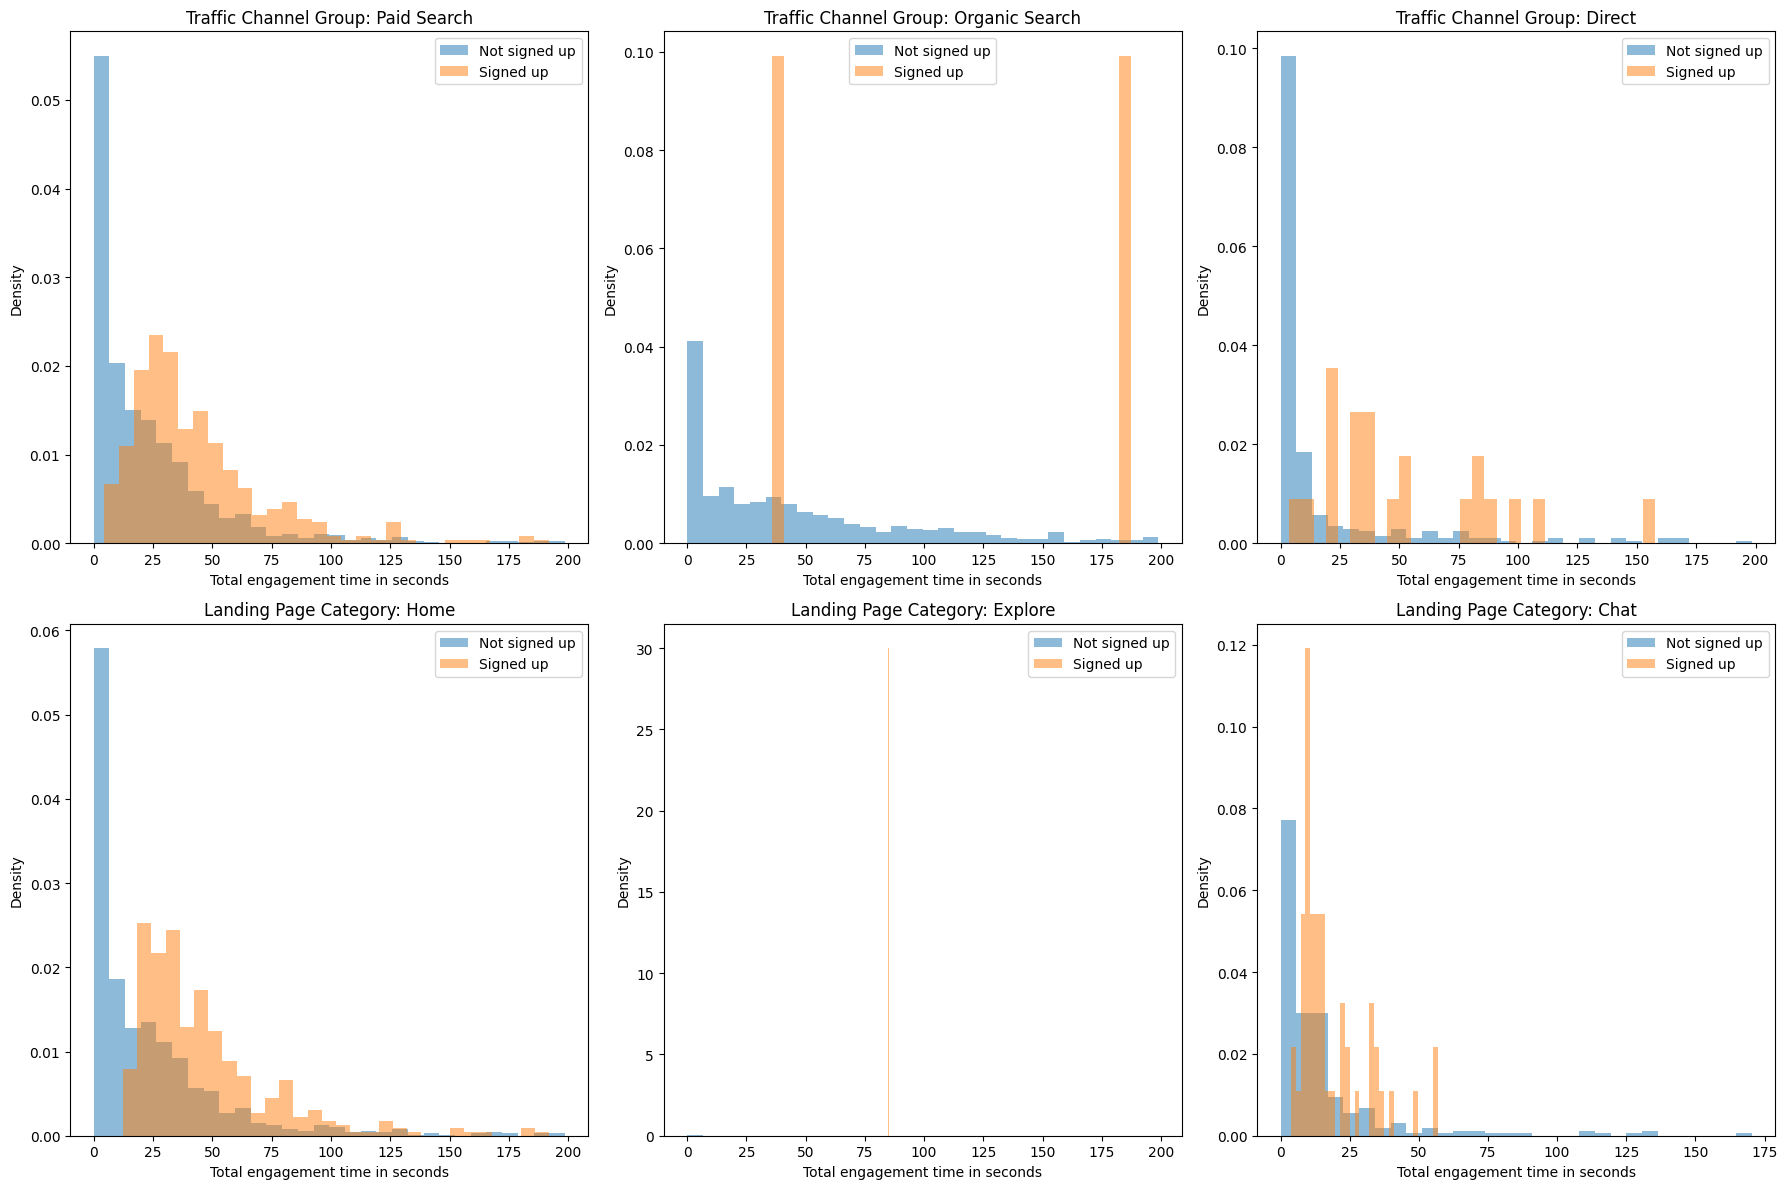

In [34]:
# Load preprocessed data
df = pd.read_csv("../data/raw/raw_signups.csv")
df = df.dropna()  # Drop rows with missing values
# Remove outliers
df = df[df["total_engagement_sec"] < 200]

# Define the specific traffic channel groups and landing page categories
traffic_channel_groups = ["Paid Search", "Organic Search", "Direct"]
landing_page_categories = ["Home", "Explore", "Chat"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
density = True
# Plot for traffic channel groups
for i, group in enumerate(traffic_channel_groups):
    ax = axes[0, i]
    ax.hist(df[(df["signed_up"] == 0) & (df["first_traffic_channel_group"] == group)]["total_engagement_sec"], bins=30, alpha=0.5, label="Not signed up", density=density)
    ax.hist(df[(df["signed_up"] == 1) & (df["first_traffic_channel_group"] == group)]["total_engagement_sec"], bins=30, alpha=0.5, label="Signed up", density=density)
    ax.set_title(f'Traffic Channel Group: {group}')
    ax.set_xlabel("Total engagement time in seconds")
    ax.set_ylabel("Density")
    ax.legend()

# Plot for landing page categories
for i, category in enumerate(landing_page_categories):
    ax = axes[1, i]
    ax.hist(df[(df["signed_up"] == 0) & (df["landing_page_category"] == category)]["total_engagement_sec"], bins=30, alpha=0.5, label="Not signed up", density=density)
    ax.hist(df[(df["signed_up"] == 1) & (df["landing_page_category"] == category)]["total_engagement_sec"], bins=30, alpha=0.5, label="Signed up", density=density)
    ax.set_title(f'Landing Page Category: {category}')
    ax.set_xlabel("Total engagement time in seconds")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

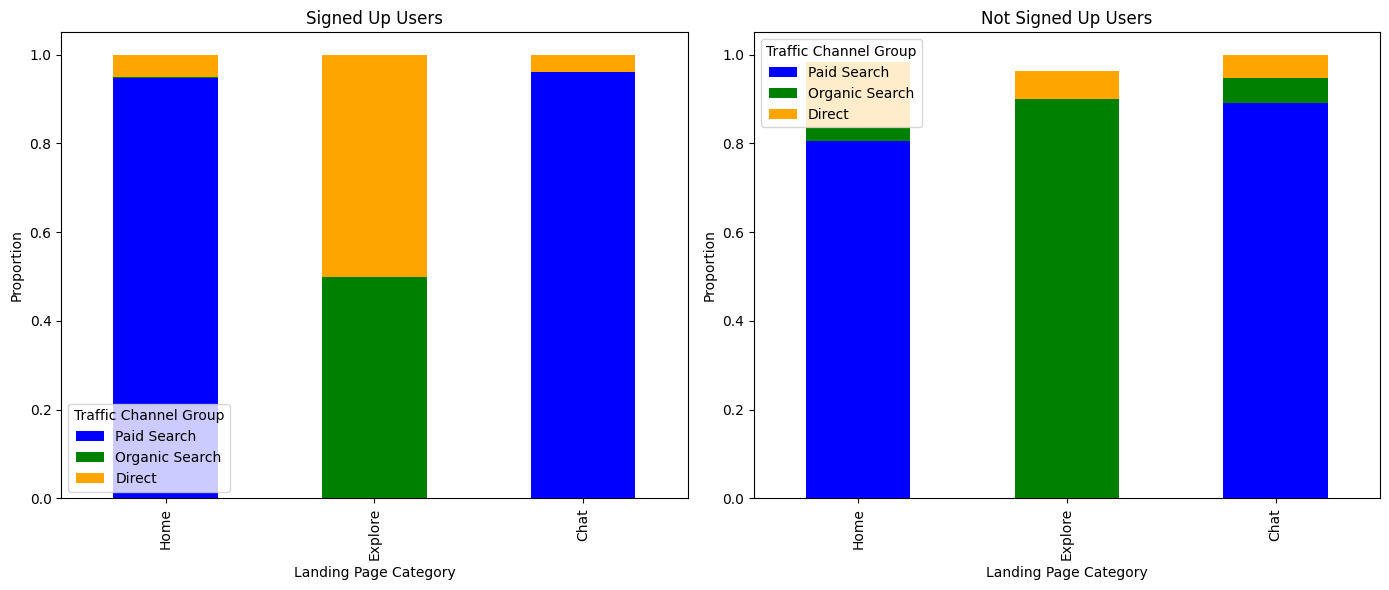

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load preprocessed data
df = pd.read_csv("../data/raw/raw_signups.csv")
df = df.dropna()  # Drop rows with missing values

# Define the specific traffic channel groups and landing page categories
traffic_channel_groups = ["Paid Search", "Organic Search", "Direct"]
landing_page_categories = ["Home", "Explore", "Chat"]

# Prepare data for stacked bar charts
stacked_data_signed_up = df[df["signed_up"] == 1].groupby("landing_page_category")["first_traffic_channel_group"].value_counts(normalize=True).unstack().fillna(0)
stacked_data_not_signed_up = df[df["signed_up"] == 0].groupby("landing_page_category")["first_traffic_channel_group"].value_counts(normalize=True).unstack().fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for signed up users
stacked_data_signed_up.loc[landing_page_categories, traffic_channel_groups].plot(kind='bar', stacked=True, ax=axes[0], color=['blue', 'green', 'orange'])
axes[0].set_xlabel('Landing Page Category')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Signed Up Users')
axes[0].legend(title='Traffic Channel Group')

# Plot for not signed up users
stacked_data_not_signed_up.loc[landing_page_categories, traffic_channel_groups].plot(kind='bar', stacked=True, ax=axes[1], color=['blue', 'green', 'orange'])
axes[1].set_xlabel('Landing Page Category')
axes[1].set_ylabel('Proportion')
axes[1].set_title('Not Signed Up Users')
axes[1].legend(title='Traffic Channel Group')

plt.tight_layout()
plt.show()

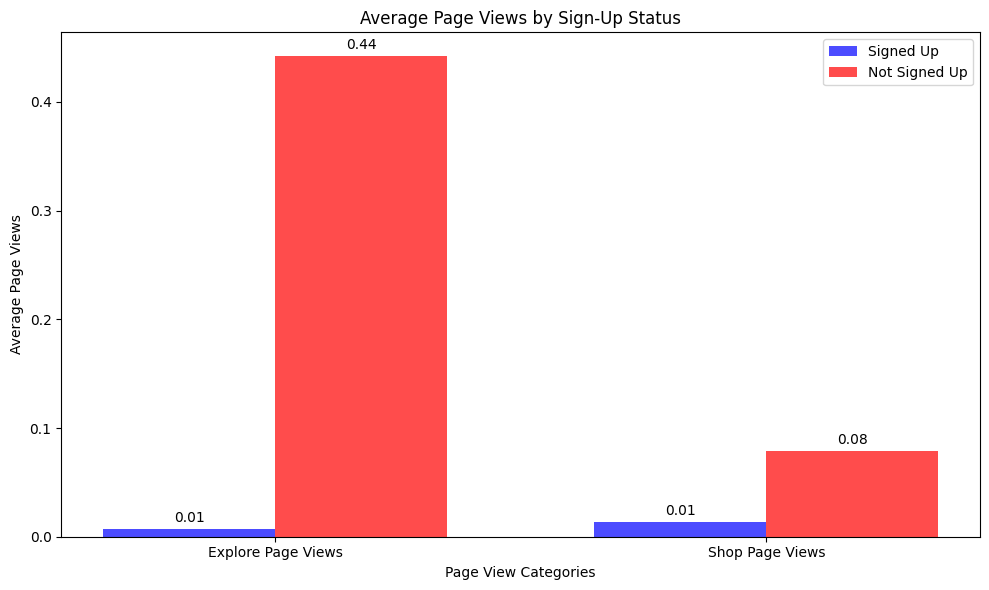

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load preprocessed data
df = pd.read_csv("../data/raw/raw_signups.csv")
df = df.dropna()  # Drop rows with missing values

# Calculate the average of explore_page_views and shop_page_views for signed up and not signed up users
avg_explore_page_views_signed_up = df[df["signed_up"] == 1]["explore_page_views"].mean()
avg_explore_page_views_not_signed_up = df[df["signed_up"] == 0]["explore_page_views"].mean()

avg_shop_page_views_signed_up = df[df["signed_up"] == 1]["shop_page_views"].mean()
avg_shop_page_views_not_signed_up = df[df["signed_up"] == 0]["shop_page_views"].mean()

# Prepare data for plotting
categories = ['Explore Page Views', 'Shop Page Views']
signed_up_means = [avg_explore_page_views_signed_up, avg_shop_page_views_signed_up]
not_signed_up_means = [avg_explore_page_views_not_signed_up, avg_shop_page_views_not_signed_up]

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35  # the width of the bars
x = np.arange(len(categories))  # the label locations

# Plot the average page views
bars1 = ax.bar(x - width/2, signed_up_means, width, label='Signed Up', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, not_signed_up_means, width, label='Not Signed Up', color='red', alpha=0.7)

ax.set_xlabel('Page View Categories')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Page Views by Sign-Up Status')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

### Page Views

Users who don't sign up are more likely to view explore or shop pages than users who did sign up. 
However, users who don't sign up view more explore pages than shop pages, while the opposite is true for users who do sign up. 
- Could suggest that chat users are more likely to click on product recommendations than article recommendations. We should verify this when the GA conversation events are up and running.